In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
from pandas.api.types import is_numeric_dtype

# Gather Data

In [4]:
#Step 1 - Read in data
csv_filepath = "../starter_code/exoplanet_data.csv"
df = pd.read_csv(csv_filepath)
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
#Step 2 - Preview Data Info - Check for null values, check for encoding needs, check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

In [6]:
#Check Data Distribution
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,0.730631,1.945368,-0.337243,5.549368,0.320715,-0.320715,2.391190e+04,130.789186,-130.789186,121.194193,19.483454,-40.352509,1095.152768,8.263769e+03,3.599918e+03,-4.302621e+03,276.038764,1.233729,5700.682449,143.898155,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,3.346956,9.401850,1.349036,6.425205,0.665352,0.665352,8.241240e+04,4689.233030,4689.233030,3519.737626,436.752064,1366.939375,856.234809,1.775255e+05,5.607270e+04,9.924848e+04,824.788481,0.650089,802.060405,46.566511,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.167000,0.000000,-20.200000,7.500000e+00,0.000000,-388600.000000,0.140000,0.000000,-77180.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,1.600000,1.000000,2661.000000,0.000000,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,0.198000,0.039900,-0.446000,2.446000,0.048900,-0.334000,1.604000e+02,9.400000,-48.000000,1.400000,0.240000,-2.080000,554.000000,2.227000e+01,1.139000e+01,-3.068950e+02,12.400000,1.000000,5297.000000,105.000000,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,0.539000,0.189800,-0.204000,3.793000,0.137000,-0.137000,4.245000e+02,20.200000,-20.200000,2.420000,0.520000,-0.310000,888.000000,1.466700e+02,8.090000e+01,-4.443000e+01,23.700000,1.000000,5757.000000,156.000000,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,0.891000,0.379000,-0.044000,6.197500,0.334000,-0.048900,1.533250e+03,48.000000,-9.400000,15.965000,2.650000,-0.140000,1397.500000,9.006700e+02,5.529550e+02,-6.400000e+00,82.250000,1.000000,6110.000000,174.000000,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,100.806000,85.540000,0.000000,138.540000,20.200000,0.000000,1.541400e+06,388600.000000,0.000000,200346.000000,21640.000000,0.000000,14667.000000,1.094755e+07,3.617133e+06,0.000000e+00,9054.700000,8.000000,15896.000000,676.000000,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


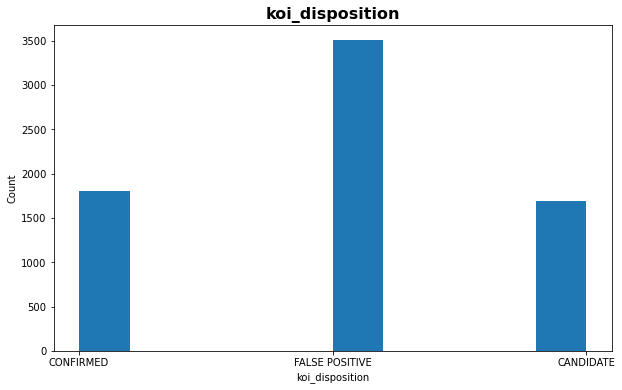

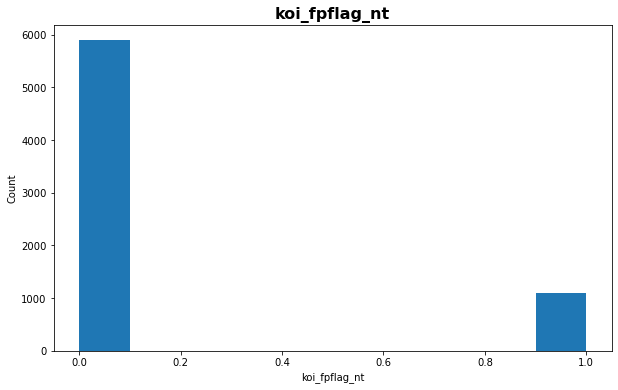

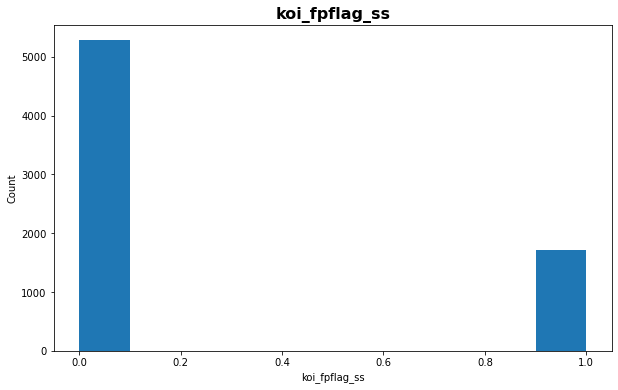

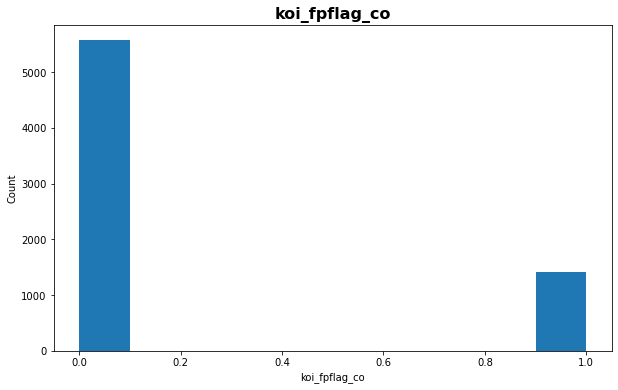

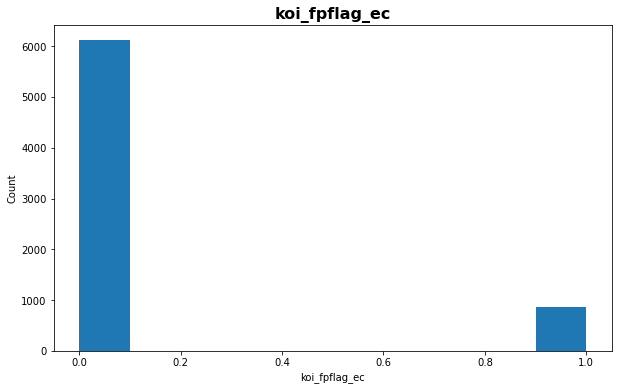

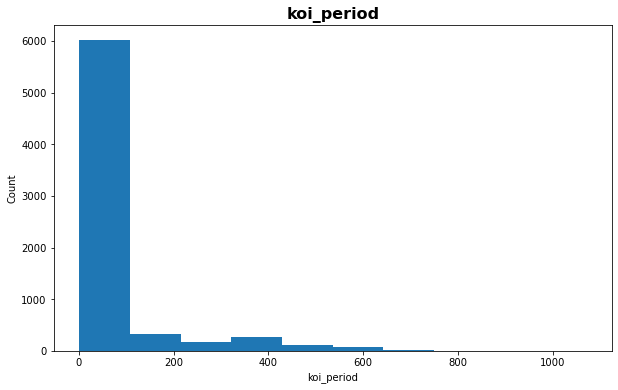

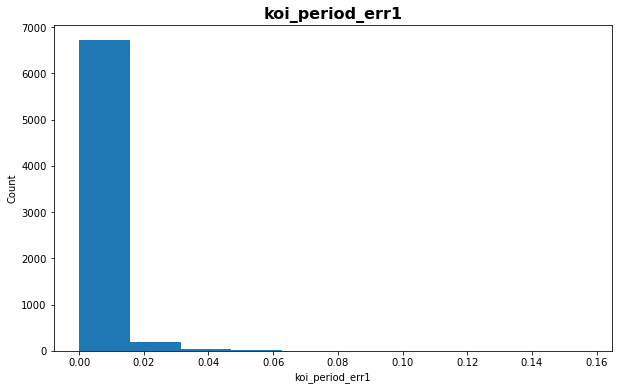

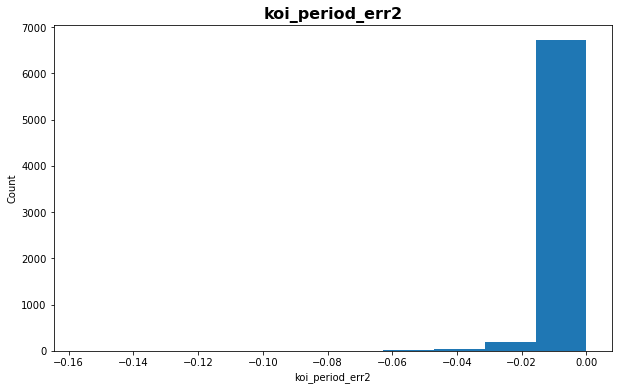

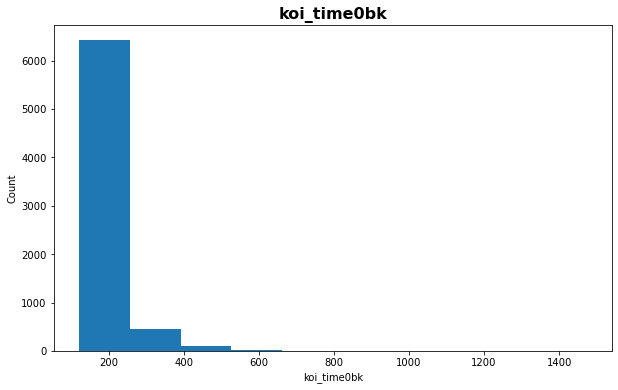

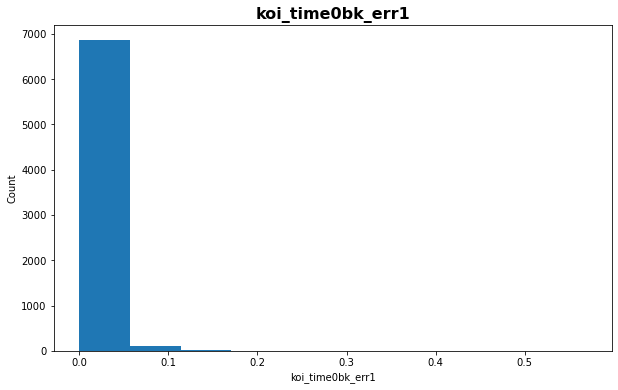

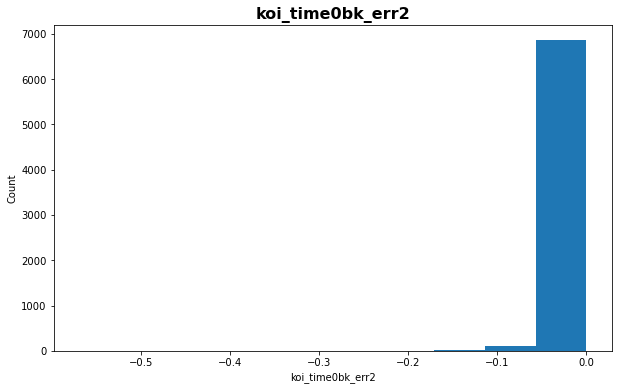

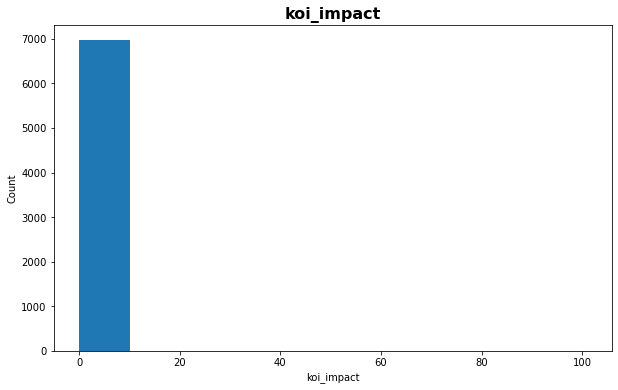

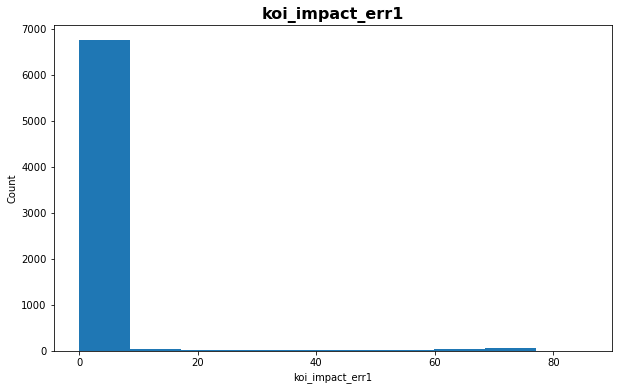

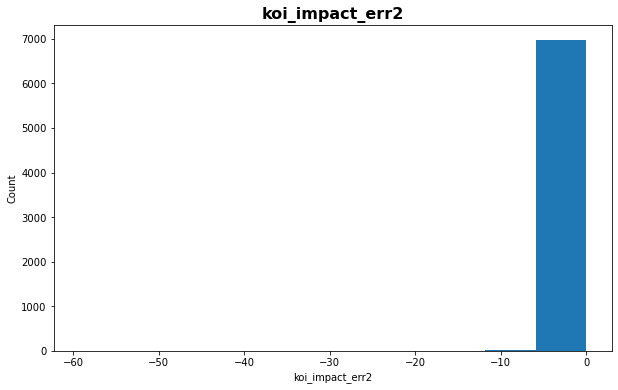

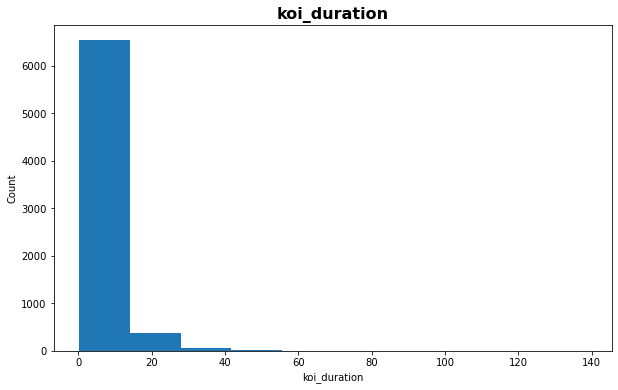

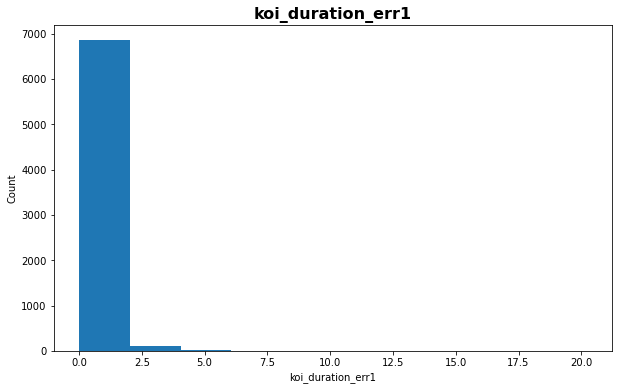

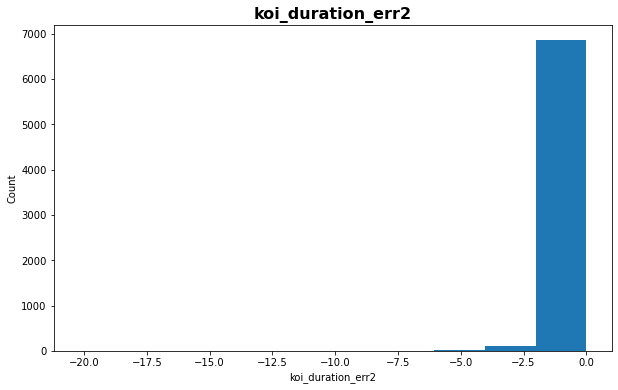

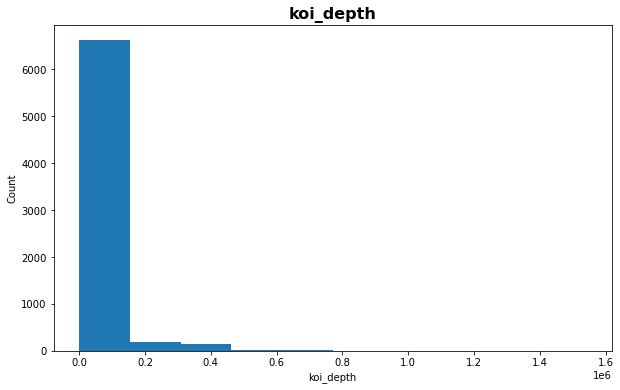

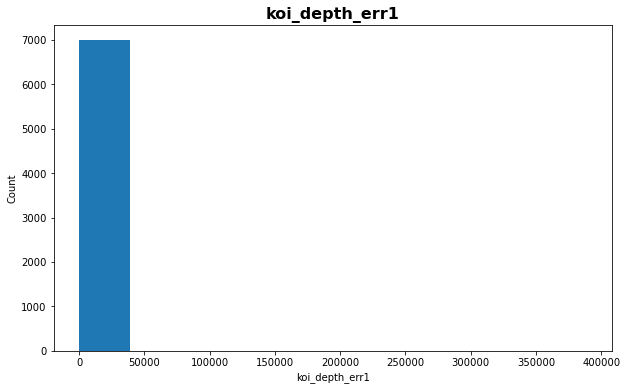

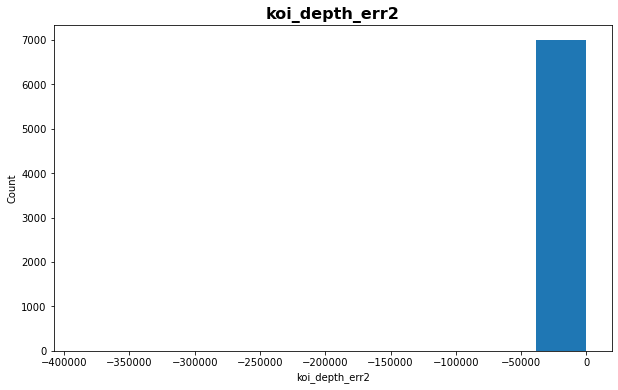

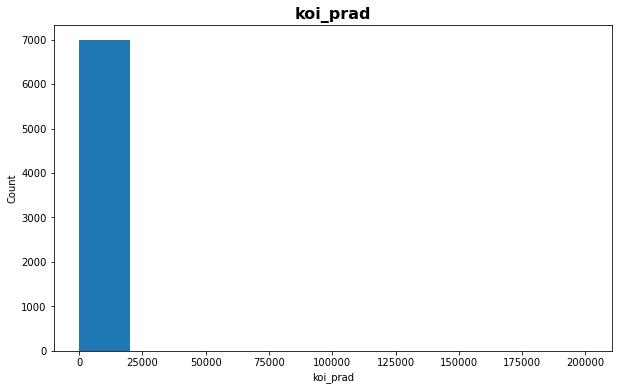

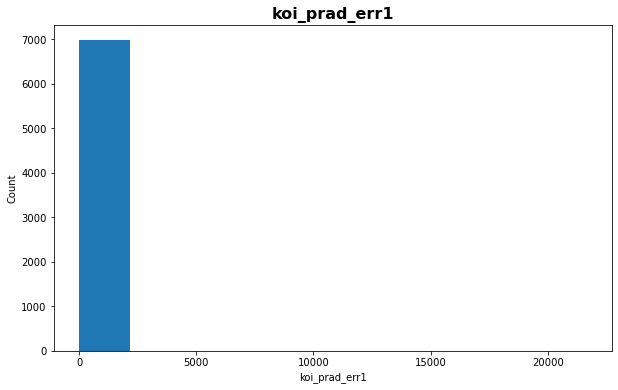

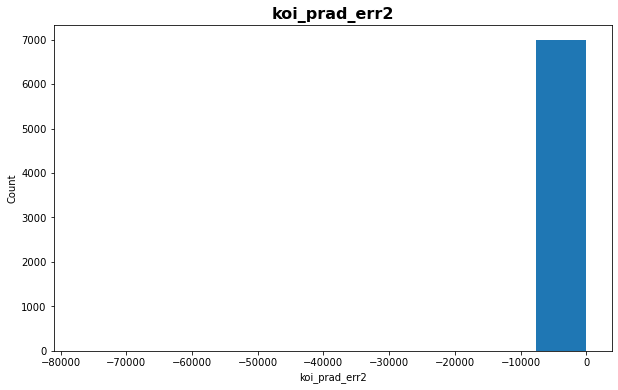

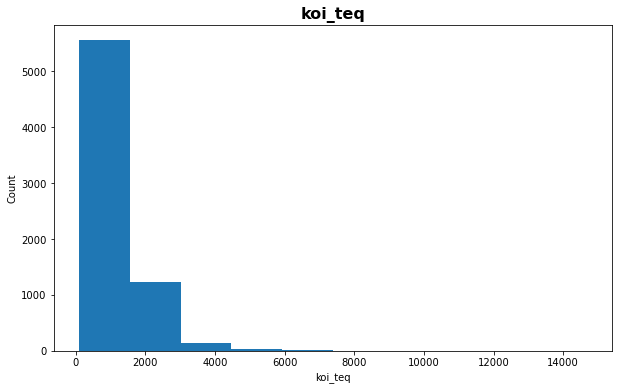

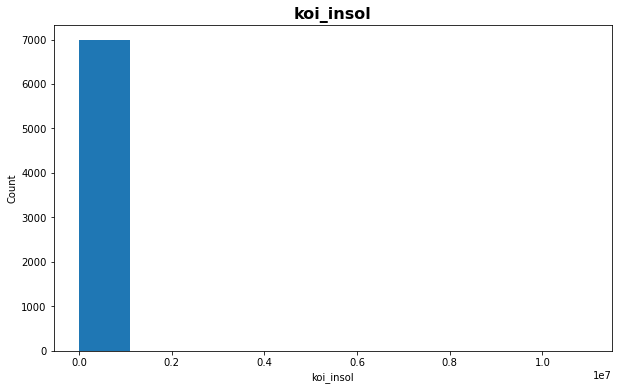

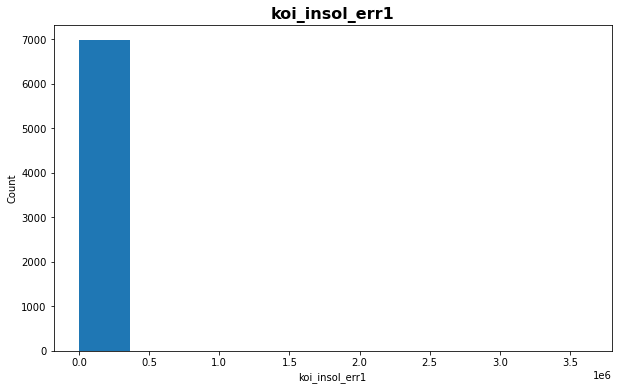

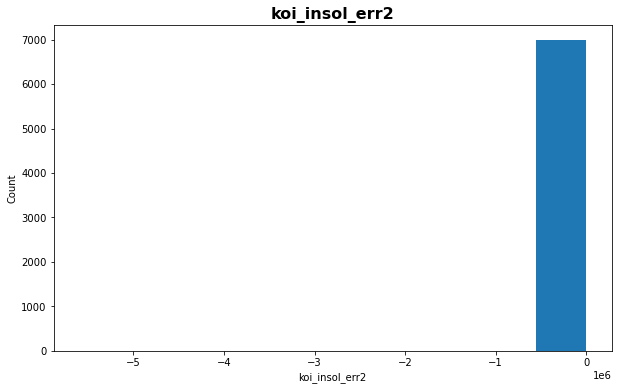

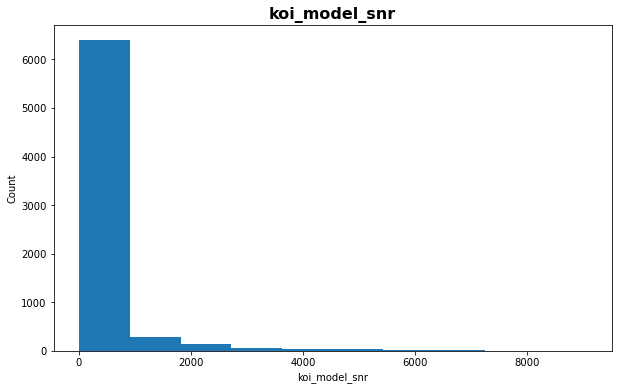

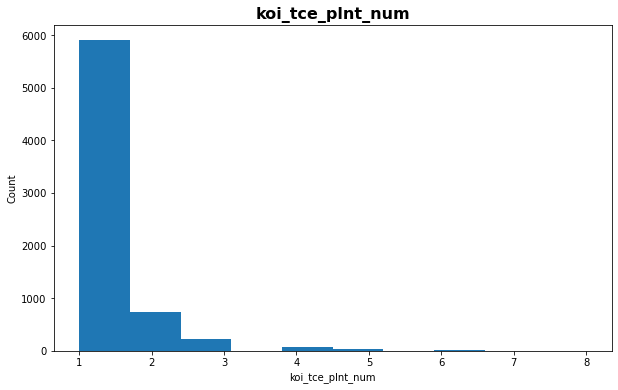

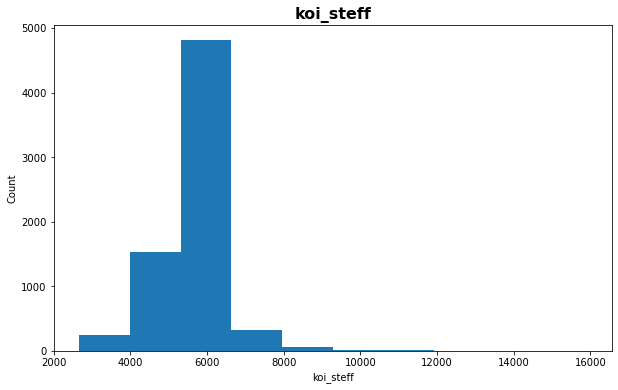

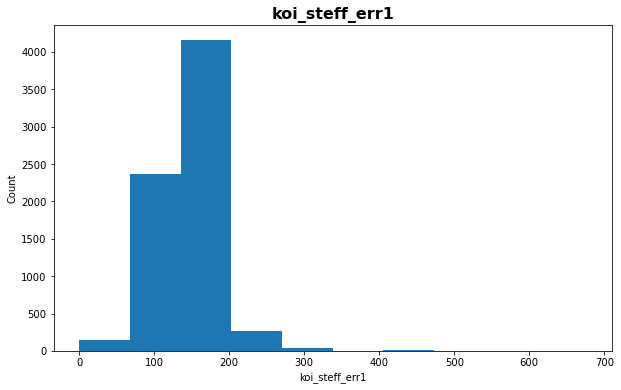

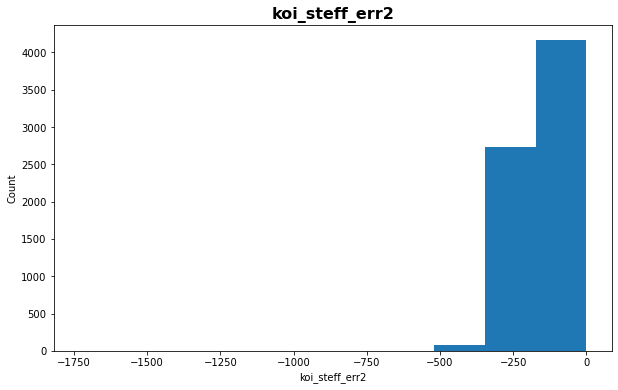

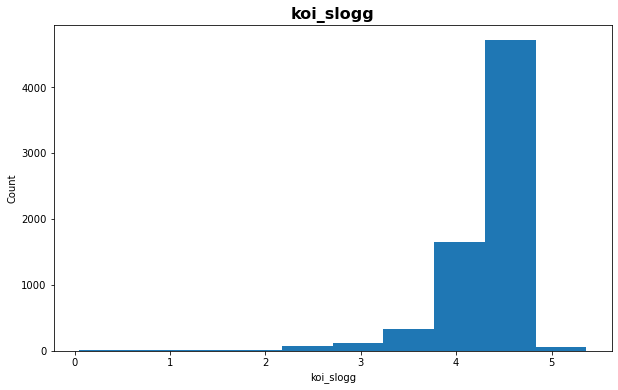

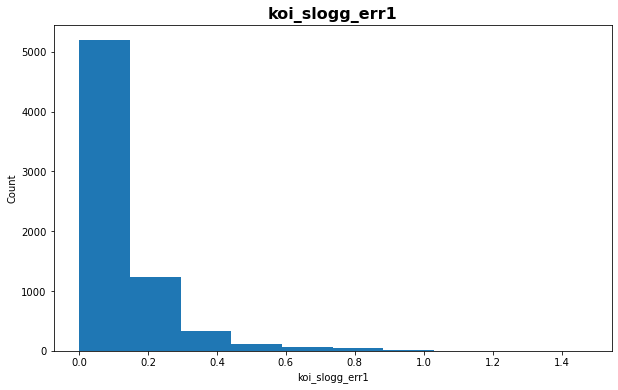

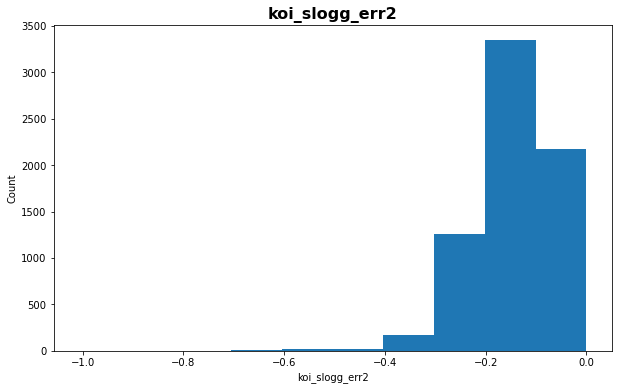

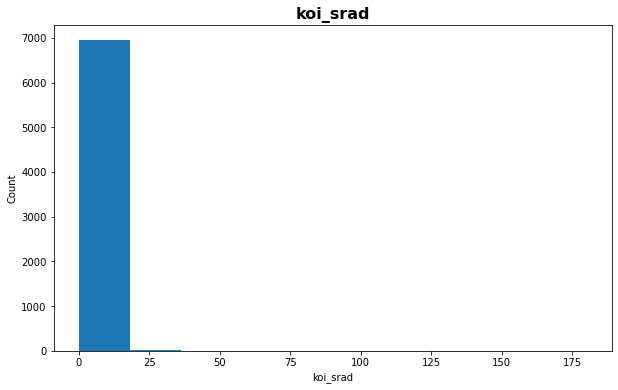

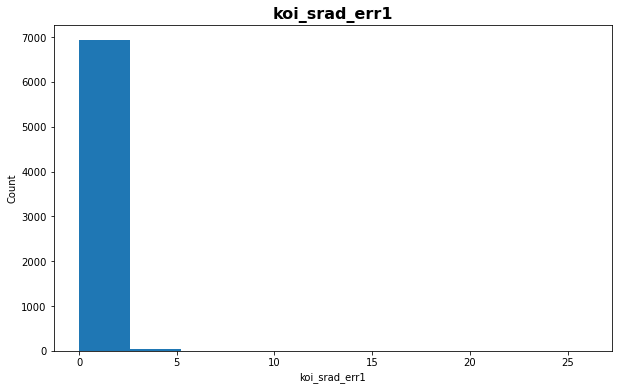

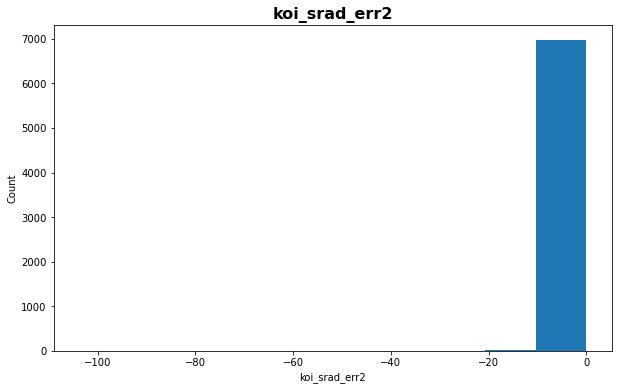

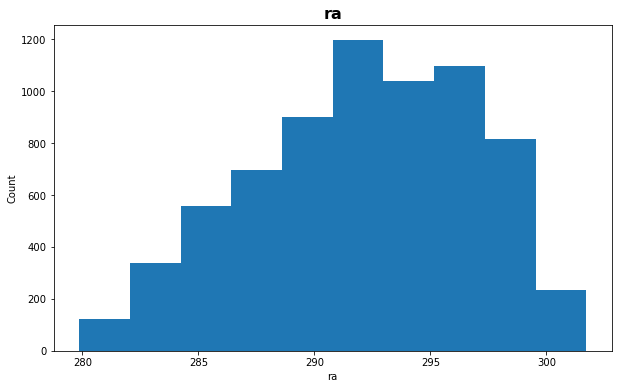

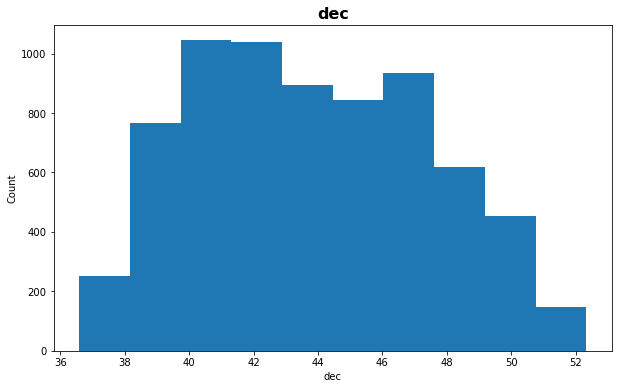

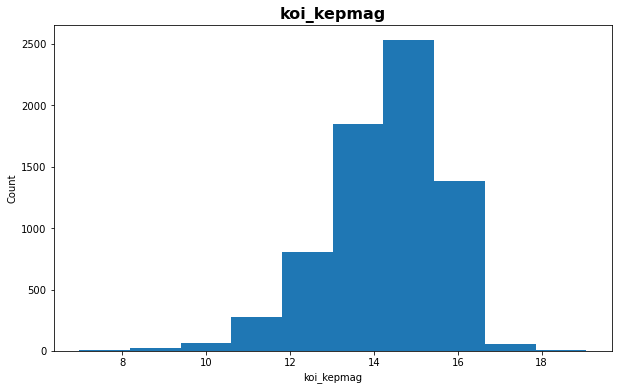

In [17]:
#Check Data Distribution with Histograms - Shows a high degree of right and left skew in our dataset
for col in df.columns:
    plt.figure(figsize=(10,6))
    plt.hist(df[col])
    plt.title(col, fontsize=16, fontweight="bold")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()

In [8]:
#Groupby our dataset
df.groupby("koi_disposition").size()

koi_disposition
CANDIDATE         1687
CONFIRMED         1800
FALSE POSITIVE    3504
dtype: int64

# Data Cleaning

In [9]:
#Fix Nulls
#Make Features Numeric- Encoding
#Scaling

In [10]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler

In [11]:
x_scaler = StandardScaler()

In [14]:
features = df.drop("koi_disposition", axis=1)
x_scaler.fit(features)

features_scaled= x_scaler.transform(features)

In [16]:
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled["koi_disposition"] = df["koi_disposition"]

df_scaled.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition
0,-0.431651,-0.569257,-0.504645,-0.377995,-0.015080,-0.223166,0.223166,-0.029470,-0.264701,0.264701,-0.043216,-0.200652,-0.078400,-0.162243,-0.307701,0.307701,-0.279554,-0.020322,0.020322,-0.033631,-0.043880,0.029383,-0.761706,-0.046502,-0.064154,0.043339,-0.303419,1.178801,-0.306336,-1.350813,1.122665,0.368735,-0.432383,0.542544,-0.137854,-0.295260,0.171712,-0.031113,1.200670,0.796245,CONFIRMED
1,-0.431651,1.756677,-0.504645,-0.377995,-0.308705,-0.255599,0.255599,0.169534,-0.398369,0.398369,0.071225,0.338323,0.192924,-0.586353,-0.430803,0.430803,-0.158761,0.008576,-0.008576,-0.030287,-0.035637,0.028564,-0.533949,-0.046332,-0.063652,0.043249,-0.242187,-0.359560,0.189921,0.302854,-0.207059,0.544051,-0.583854,-0.433254,-0.147848,-0.142689,0.162800,1.033563,1.198584,0.862136,FALSE POSITIVE
2,-0.431651,1.756677,-0.504645,-0.377995,-0.463194,-0.257637,0.257637,0.086827,-0.419563,0.419563,0.162957,-0.194696,0.181804,-0.489196,-0.473986,0.473986,-0.192129,-0.025164,0.025164,-0.024928,-0.025150,0.027452,0.350218,-0.041528,-0.052275,0.041034,0.278347,-0.359560,0.130071,0.281378,-0.179065,0.589588,-0.515692,-0.335674,-0.160893,-0.180832,0.168566,-1.374846,1.240482,0.981333,FALSE POSITIVE
3,-0.431651,-0.569257,-0.504645,-0.377995,-0.456486,-0.257150,0.257150,0.106046,-0.373400,0.373400,-0.008854,-0.181931,-0.104347,-0.606229,-0.418929,0.418929,-0.282849,-0.024289,0.024289,-0.033654,-0.042598,0.029266,0.363066,-0.041336,-0.048612,0.040189,-0.285110,-0.359560,0.411866,0.539092,-0.696958,0.302707,-0.386942,-0.847968,-0.117694,-0.022302,0.133969,-0.698683,1.224118,0.916182,CONFIRMED
4,-0.431651,-0.569257,-0.504645,-0.377995,-0.442801,-0.256212,0.256212,0.126695,-0.338380,0.338380,0.009373,-0.192143,-0.144378,-0.374983,-0.380901,0.380901,-0.281845,-0.023905,0.023905,-0.033648,-0.042552,0.029303,0.075741,-0.044144,-0.056709,0.041978,-0.285959,1.178801,0.430569,0.968616,-0.990897,0.411995,-0.508118,-1.079720,-0.130230,-0.044949,0.148647,0.882659,1.223693,1.067955,CONFIRMED


# Correlations

In [20]:
df_scaled.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_label
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643,0.380710
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009,0.486481
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023,0.452002
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932,0.339983
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959,0.023592
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097,0.047197
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097,-0.047197
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898,-0.009463
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.1

In [19]:
target_labels = []
for _, row in df_scaled.iterrows():
    if row.koi_disposition == "CANDIDATE":
        target_labels.append(0)
    elif row.koi_disposition == "CONFIRMED":
        target_labels.append(1)
    else:
        target_labels.append(2)
        
df_scaled["koi_disposition_label"] = target_labels
df_scaled.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition,koi_disposition_label
0,-0.431651,-0.569257,-0.504645,-0.377995,-0.015080,-0.223166,0.223166,-0.029470,-0.264701,0.264701,-0.043216,-0.200652,-0.078400,-0.162243,-0.307701,0.307701,-0.279554,-0.020322,0.020322,-0.033631,-0.043880,0.029383,-0.761706,-0.046502,-0.064154,0.043339,-0.303419,1.178801,-0.306336,-1.350813,1.122665,0.368735,-0.432383,0.542544,-0.137854,-0.295260,0.171712,-0.031113,1.200670,0.796245,CONFIRMED,1
1,-0.431651,1.756677,-0.504645,-0.377995,-0.308705,-0.255599,0.255599,0.169534,-0.398369,0.398369,0.071225,0.338323,0.192924,-0.586353,-0.430803,0.430803,-0.158761,0.008576,-0.008576,-0.030287,-0.035637,0.028564,-0.533949,-0.046332,-0.063652,0.043249,-0.242187,-0.359560,0.189921,0.302854,-0.207059,0.544051,-0.583854,-0.433254,-0.147848,-0.142689,0.162800,1.033563,1.198584,0.862136,FALSE POSITIVE,2
2,-0.431651,1.756677,-0.504645,-0.377995,-0.463194,-0.257637,0.257637,0.086827,-0.419563,0.419563,0.162957,-0.194696,0.181804,-0.489196,-0.473986,0.473986,-0.192129,-0.025164,0.025164,-0.024928,-0.025150,0.027452,0.350218,-0.041528,-0.052275,0.041034,0.278347,-0.359560,0.130071,0.281378,-0.179065,0.589588,-0.515692,-0.335674,-0.160893,-0.180832,0.168566,-1.374846,1.240482,0.981333,FALSE POSITIVE,2
3,-0.431651,-0.569257,-0.504645,-0.377995,-0.456486,-0.257150,0.257150,0.106046,-0.373400,0.373400,-0.008854,-0.181931,-0.104347,-0.606229,-0.418929,0.418929,-0.282849,-0.024289,0.024289,-0.033654,-0.042598,0.029266,0.363066,-0.041336,-0.048612,0.040189,-0.285110,-0.359560,0.411866,0.539092,-0.696958,0.302707,-0.386942,-0.847968,-0.117694,-0.022302,0.133969,-0.698683,1.224118,0.916182,CONFIRMED,1
4,-0.431651,-0.569257,-0.504645,-0.377995,-0.442801,-0.256212,0.256212,0.126695,-0.338380,0.338380,0.009373,-0.192143,-0.144378,-0.374983,-0.380901,0.380901,-0.281845,-0.023905,0.023905,-0.033648,-0.042552,0.029303,0.075741,-0.044144,-0.056709,0.041978,-0.285959,1.178801,0.430569,0.968616,-0.990897,0.411995,-0.508118,-1.079720,-0.130230,-0.044949,0.148647,0.882659,1.223693,1.067955,CONFIRMED,1


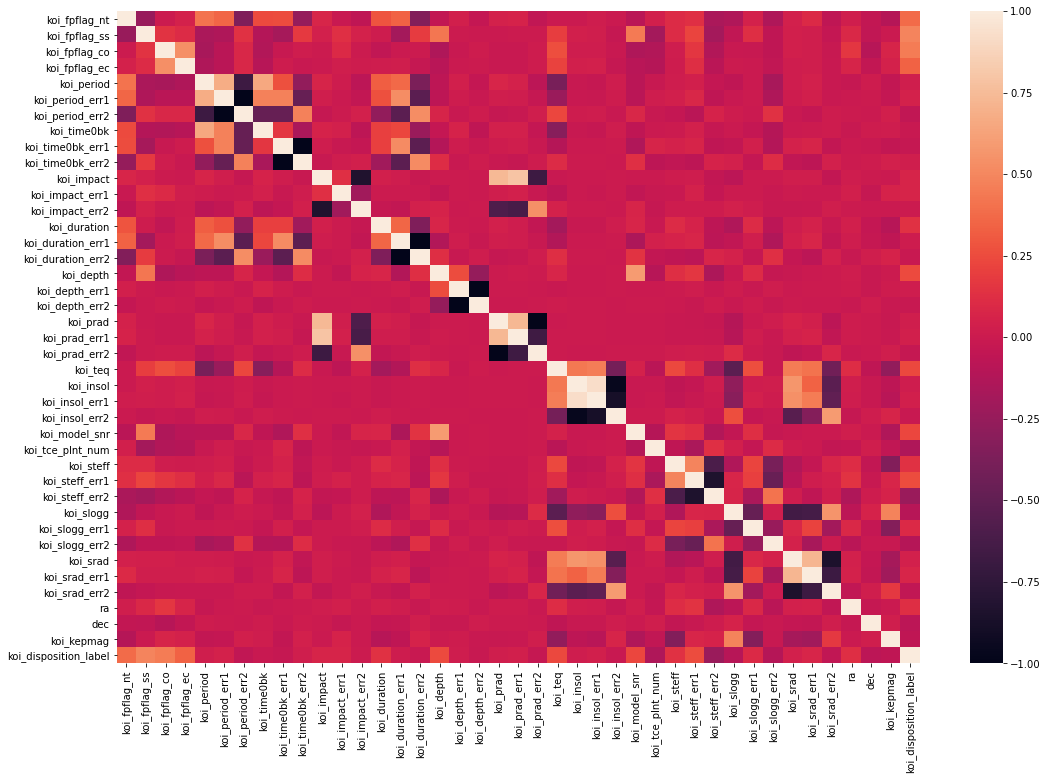

In [21]:
plt.figure(figsize = (18,12))
sns.heatmap(df_scaled.corr())
plt.show()

In [23]:
#Find Correlations > .05
corrs = abs(df_scaled.corr()["koi_disposition_label"]).sort_values()

predictive_cols = []
for name, col in corrs.iteritems():
    if col > .05:
        predictive_cols.append(name)
        
predictive_cols

['koi_srad_err2',
 'koi_kepmag',
 'koi_impact_err1',
 'koi_impact',
 'dec',
 'koi_srad_err1',
 'koi_slogg_err1',
 'koi_slogg',
 'koi_slogg_err2',
 'ra',
 'koi_steff',
 'koi_duration',
 'koi_tce_plnt_num',
 'koi_steff_err2',
 'koi_model_snr',
 'koi_teq',
 'koi_depth',
 'koi_steff_err1',
 'koi_fpflag_ec',
 'koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_fpflag_ss',
 'koi_disposition_label']